## "Predicting House Prices in Indian Metropolitan Cities: A Comprehensive Analysis and Price Forecasting Model"

## "House Price Prediction Model for Mumbai, India"

#### Components of the House Price Prediction Model:

1. Importing Dependencies
2. Data Importing 
3. Preprocessing 
4. Visualization 
5. Standardizing the Data
6. Label Encoding
7. Model Training
8. Model Deployment

#### 1. Importing dependencies.

We imported NumPy and Pandas for data handling, Matplotlib and Seaborn for visualization, and essential machine learning tools such as RandomForestRegressor and XGBRegressor for predictive modeling. Additionally, we included preprocessing tools like StandardScaler and LabelEncoder for data preprocessing and evaluation metrics like r2_score for assessing model performance and pickle for deployment purpose.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle

#### 2. Importing Mumbai House Price Dataset.

In [4]:
data = pd.read_csv("C:/Users/aksha/OneDrive/Documents/SRM_Internship_project/Indian_cities/Mumbai.csv")

#### 3. Preprocessing

3.1 We quickly review a subset of the dataset using data.sample() to gain insights into its contents.

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.sample(5)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
1293,35000000,1835,Samata Nagar Thakur Village,3,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,1,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0
1255,5545000,902,Haware City,2,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
332,11000000,1255,Sector 21 Kamothe,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1163,13500000,950,Wadala East Wadala,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
146,11000000,1415,Kharghar,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0


##### Overview of Each Column:

1. **Price**: Target variable representing the price of the property.
2. **Area**: Non-categorical column indicating the area (size) of the property.
3. **Location**: Non-categorical column indicating the location of the property.
4. **No. of Bedrooms**: Number of bedrooms in the property.
5. **Resale**: Binary indicator (0 or 1) representing whether the property is a resale.
6. **MaintenanceStaff**: Binary indicator representing the availability of maintenance staff.
7. **Gymnasium**: Binary indicator representing the availability of a gymnasium.
8. **SwimmingPool**: Binary indicator representing the availability of a swimming pool.
9. **LandscapedGardens**: Binary indicator representing the availability of landscaped gardens.
10. **JoggingTrack**: Binary indicator representing the availability of a jogging track.
11. **RainWaterHarvesting**: Binary indicator representing the availability of rainwater harvesting.
12. **IndoorGames**: Binary indicator representing the availability of indoor games facilities.
13. **ShoppingMall**: Binary indicator representing the proximity to a shopping mall.
14. **Intercom**: Binary indicator representing the availability of an intercom system.
15. **SportsFacility**: Binary indicator representing the availability of sports facilities.
16. **ATM**: Binary indicator representing the proximity to an ATM.
17. **ClubHouse**: Binary indicator representing the availability of a clubhouse.
18. **School**: Binary indicator representing the proximity to a school.
19. **24X7Security**: Binary indicator representing the availability of 24x7 security.
20. **PowerBackup**: Binary indicator representing the availability of power backup.
21. **CarParking**: Binary indicator representing the availability of car parking.
22. **StaffQuarter**: Binary indicator representing the availability of staff quarters.
23. **Cafeteria**: Binary indicator representing the availability of a cafeteria.
24. **MultipurposeRoom**: Binary indicator representing the availability of a multipurpose room.
25. **Hospital**: Binary indicator representing the proximity to a hospital.
26. **WashingMachine**: Binary indicator representing the availability of a washing machine.
27. **Gasconnection**: Binary indicator representing the availability of a gas connection.
28. **AC**: Binary indicator representing the availability of air conditioning.
29. **Wifi**: Binary indicator representing the availability of Wi-Fi.
30. **Children'splayarea**: Binary indicator representing the availability of a children's play area.
31. **LiftAvailable**: Binary indicator representing the availability of a lift.
32. **BED**: Binary indicator representing the availability of a bed.
33. **VaastuCompliant**: Binary indicator representing whether the property is Vaastu compliant.
34. **Microwave**: Binary indicator representing the availability of a microwave.
35. **GolfCourse**: Binary indicator representing the proximity to a golf course.
36. **TV**: Binary indicator representing the availability of a television.
37. **DiningTable**: Binary indicator representing the availability of a dining table.
38. **Sofa**: Binary indicator representing the availability of a sofa.
39. **Wardrobe**: Binary indicator representing the availability of a wardrobe.
40. **Refrigerator**: Binary indicator representing the availability of a refrigerator.

In this dataset, 'Price' is the target variable we aim to predict, while 'Area' and 'Location' are the non-categorical columns. All other columns represent categorical variables indicating various features or amenities of the properties.


3.2 We're counting how many rows and columns there are in the dataset.

In [6]:
data.shape

(1398, 40)

- No of rows in dataset = 1398
- No of columns in dataset = 40

In [7]:
columns = data.columns

In [8]:
for column in columns:
    if column == 'Price':
        continue
    elif column == 'Area':
       continue
    elif column == 'Location':
       continue
    else:
     print(data[column].value_counts(),'\n========================\n')

No. of Bedrooms
2    535
1    490
3    323
4     43
5      5
6      2
Name: count, dtype: int64 

Resale
1    1074
0     324
Name: count, dtype: int64 

MaintenanceStaff
1    995
0    403
Name: count, dtype: int64 

Gymnasium
1    802
0    596
Name: count, dtype: int64 

SwimmingPool
0    874
1    524
Name: count, dtype: int64 

LandscapedGardens
0    845
1    553
Name: count, dtype: int64 

JoggingTrack
0    862
1    536
Name: count, dtype: int64 

RainWaterHarvesting
1    826
0    572
Name: count, dtype: int64 

IndoorGames
0    1129
1     269
Name: count, dtype: int64 

ShoppingMall
0    1145
1     253
Name: count, dtype: int64 

Intercom
0    888
1    510
Name: count, dtype: int64 

SportsFacility
0    1199
1     199
Name: count, dtype: int64 

ATM
0    1131
1     267
Name: count, dtype: int64 

ClubHouse
0    779
1    619
Name: count, dtype: int64 

School
0    1144
1     254
Name: count, dtype: int64 

24X7Security
1    1293
0     105
Name: count, dtype: int64 

PowerBackup
1    

3.4 Now we will take a look on statistical data

In [9]:
data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,1.398000e+03,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.00000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000
mean,1.542445e+07,1074.734621,1.958512,0.768240,0.711731,0.573677,0.374821,0.395565,0.383405,0.590844,0.192418,0.180973,0.364807,0.142346,0.190987,0.442775,0.181688,0.924893,0.846209,0.932046,0.310443,0.16166,0.181688,0.178112,0.017167,0.139485,0.066524,0.094421,0.356223,0.819027,0.264664,0.467811,0.011445,0.053648,0.050072,0.020029,0.025036,0.077253,0.026466
std,2.529268e+07,590.854053,0.870906,0.422107,0.453119,0.494719,0.484250,0.489147,0.486390,0.491854,0.394340,0.385133,0.481548,0.349530,0.393220,0.496892,0.385725,0.263659,0.360878,0.251757,0.462841,0.36827,0.385725,0.382744,0.129941,0.346576,0.249284,0.292518,0.479054,0.385133,0.441312,0.499141,0.106405,0.225403,0.218171,0.140148,0.156290,0.267088,0.160575
min,2.000000e+06,245.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.500000e+06,650.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.950000e+06,1011.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.680000e+07,1310.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000e+08,7000.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                1398 non-null   int64 
 1   Area                 1398 non-null   int64 
 2   Location             1398 non-null   object
 3   No. of Bedrooms      1398 non-null   int64 
 4   Resale               1398 non-null   int64 
 5   MaintenanceStaff     1398 non-null   int64 
 6   Gymnasium            1398 non-null   int64 
 7   SwimmingPool         1398 non-null   int64 
 8   LandscapedGardens    1398 non-null   int64 
 9   JoggingTrack         1398 non-null   int64 
 10  RainWaterHarvesting  1398 non-null   int64 
 11  IndoorGames          1398 non-null   int64 
 12  ShoppingMall         1398 non-null   int64 
 13  Intercom             1398 non-null   int64 
 14  SportsFacility       1398 non-null   int64 
 15  ATM                  1398 non-null   int64 
 16  ClubHo

key observations:

1. The 'Location' column is the only one with a data type of 'object', while all other columns are of type 'int'.
2. The lowest price recorded in the dataset is 2 million INR.
3. The highest price recorded in the dataset is 165 million INR.
4. The smallest area of a house in the dataset is 500 square units.
5. The largest area of a house in the dataset is 99,400 square units.

3.5 Checking Is there any null values.

In [11]:
data.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


3.6 "Counting Houses by Location"

In [12]:
pd.set_option('display.max_rows', None)
data.Location.value_counts()

Location
Kharghar                                  322
Magathane                                  52
Thane                                      49
Kamothe                                    32
Sector 20 Kharghar                         30
Mira Road East                             29
Kandivali East                             27
Sector 17 Ulwe                             26
Dronagiri                                  22
Dattapada                                  22
Goregaon West                              19
Thane West                                 19
Malad West                                 17
Kandivali West                             17
Ulwe                                       16
Borivali East                              16
Kalwa                                      16
Malad East                                 15
Chembur                                    13
Mira Road and Beyond                       13
Karanjade                                  13
Wadala East Wadala       

3.7 Identifying Outliers: Locations with Few Houses
Many locations have only a few houses, which may act as outliers in the data and potentially impact our model's performance. To address this, we will group locations with fewer than 11 houses together and categorize them under a separate variable.

In [13]:
location_count = data['Location'].value_counts()
location_count_less_10 = location_count[location_count<=10]

In [14]:
data['Location'] = data['Location'].apply(lambda x: 'other' if x in location_count_less_10 else x)
len(data['Location'].value_counts())

27

#### 4. Visualization

4.1 This code generates a heatmap to visualize the correlation between different features in the dataset, excluding the 'Location' column. Each cell in the heatmap represents the correlation coefficient between two features, with annotations provided to indicate the strength of correlation.

In [15]:
corr_data = data.drop(columns='Location')
corr = corr_data.corr()

<Axes: >

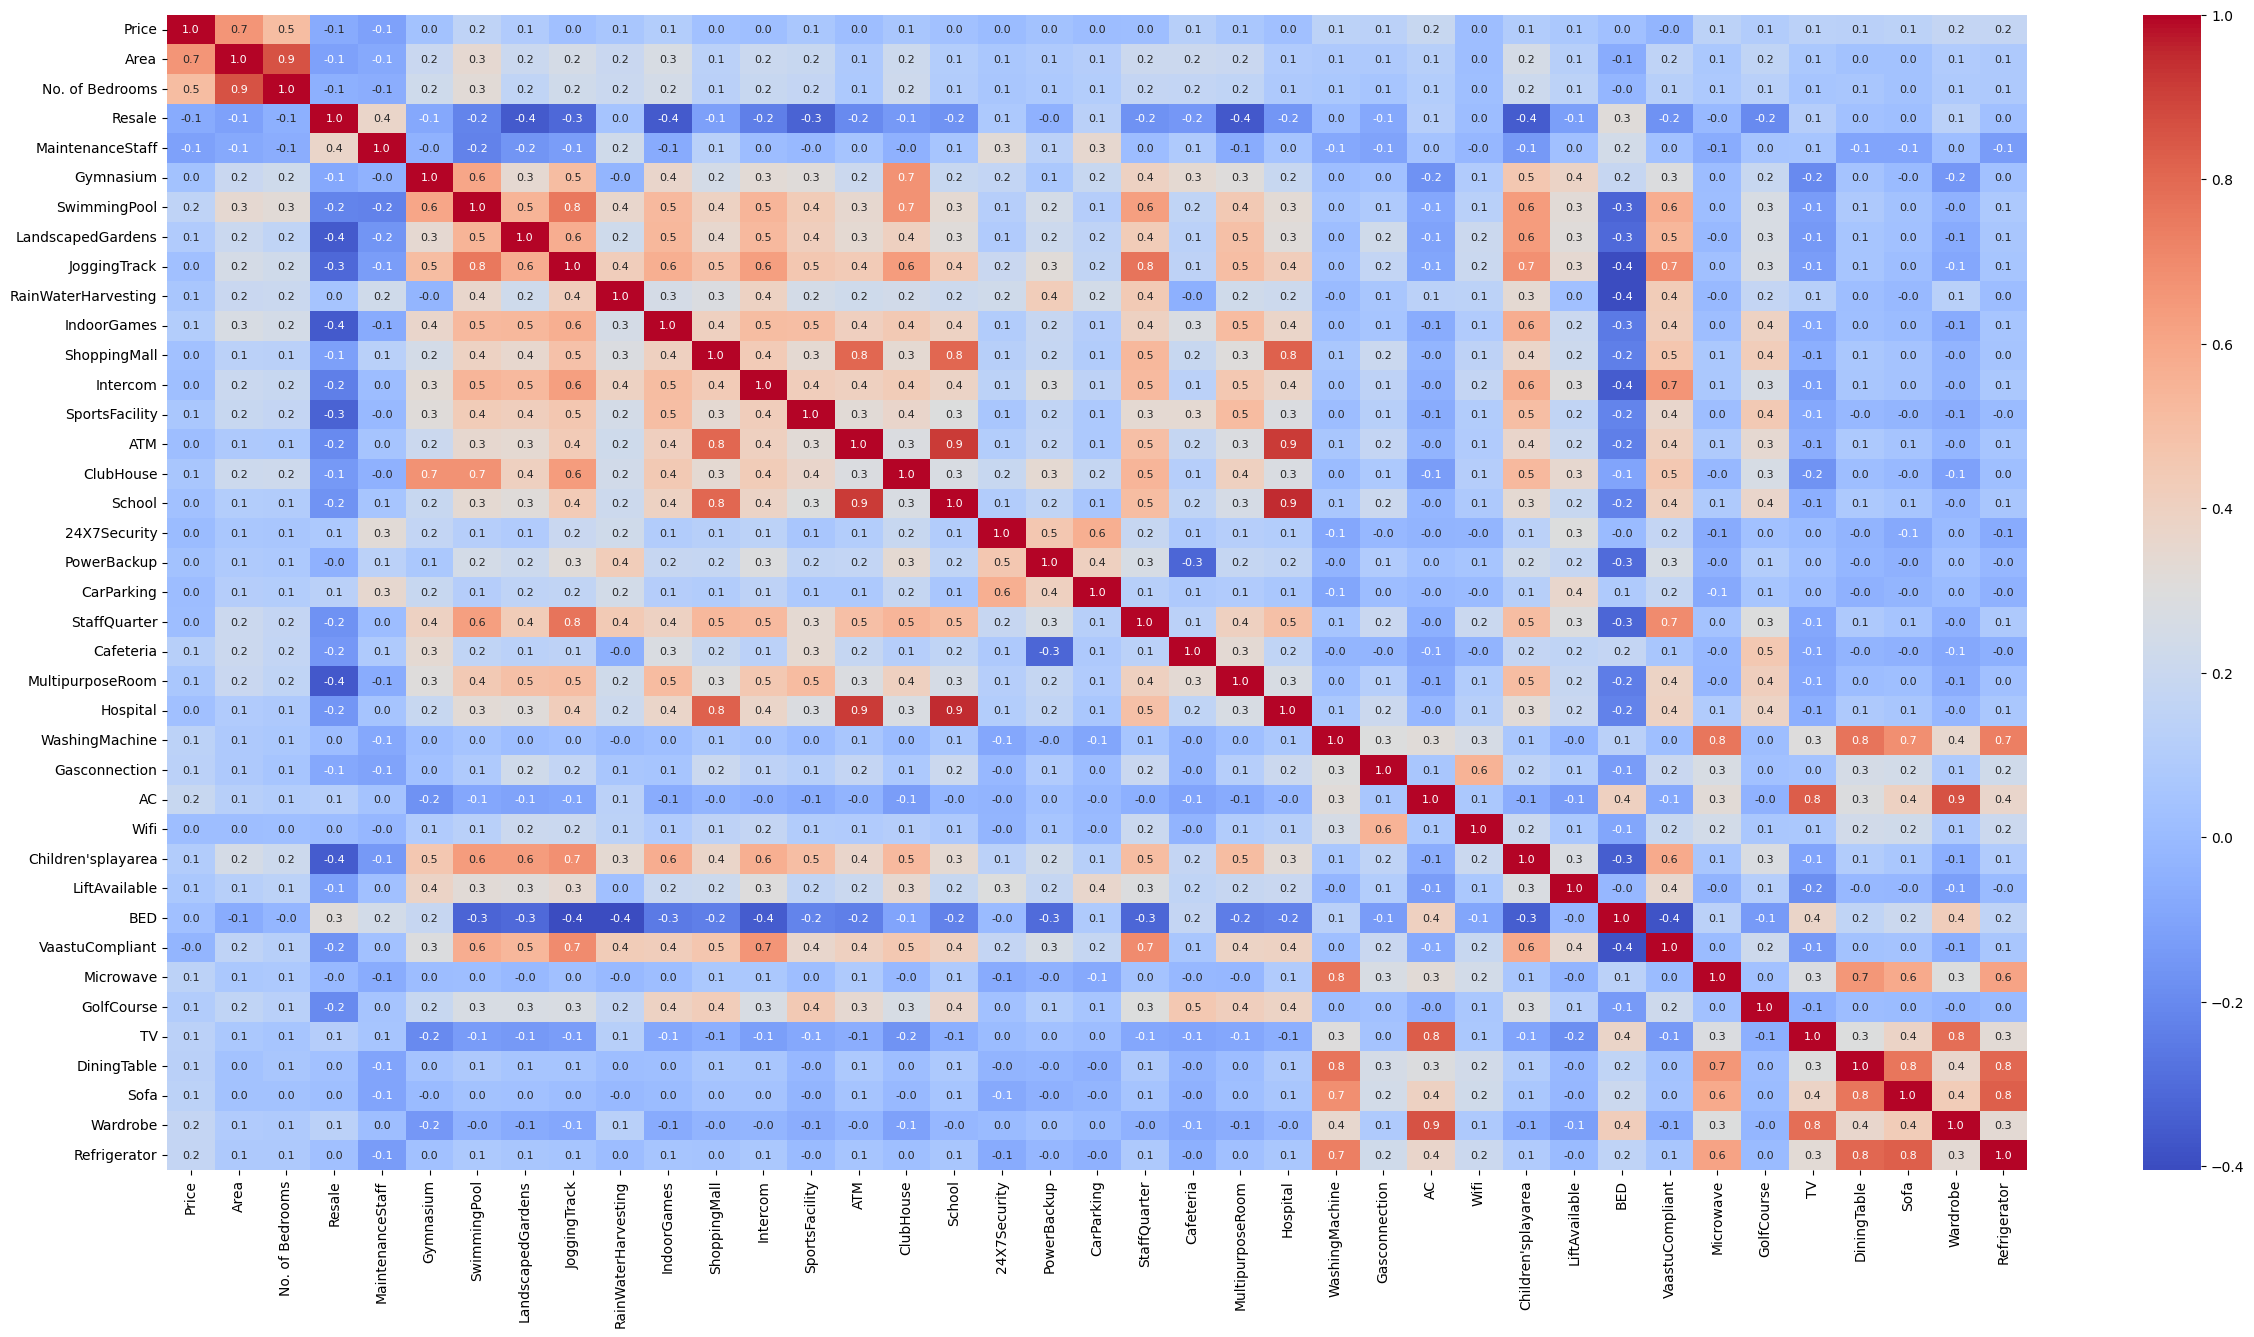

In [16]:
plt.figure(figsize=(30,15))
sns.heatmap(corr,fmt='.1f',annot=True,annot_kws={'size':8} ,cmap='coolwarm')

#### Insights from the Heat Map:

1. Dark brown color indicates strong positive correlation, while lighter brown or blue colors signify weaker positive correlation. Dark blue represents strong negative correlation.

2. For example:
   - There is a strong negative correlation between 'Vastu compaint' and 'price' of house
   - Like this We can see positive or negative correlation between various features.

4.2 Taking insights from bar plot of all categorical columns

In [17]:
data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

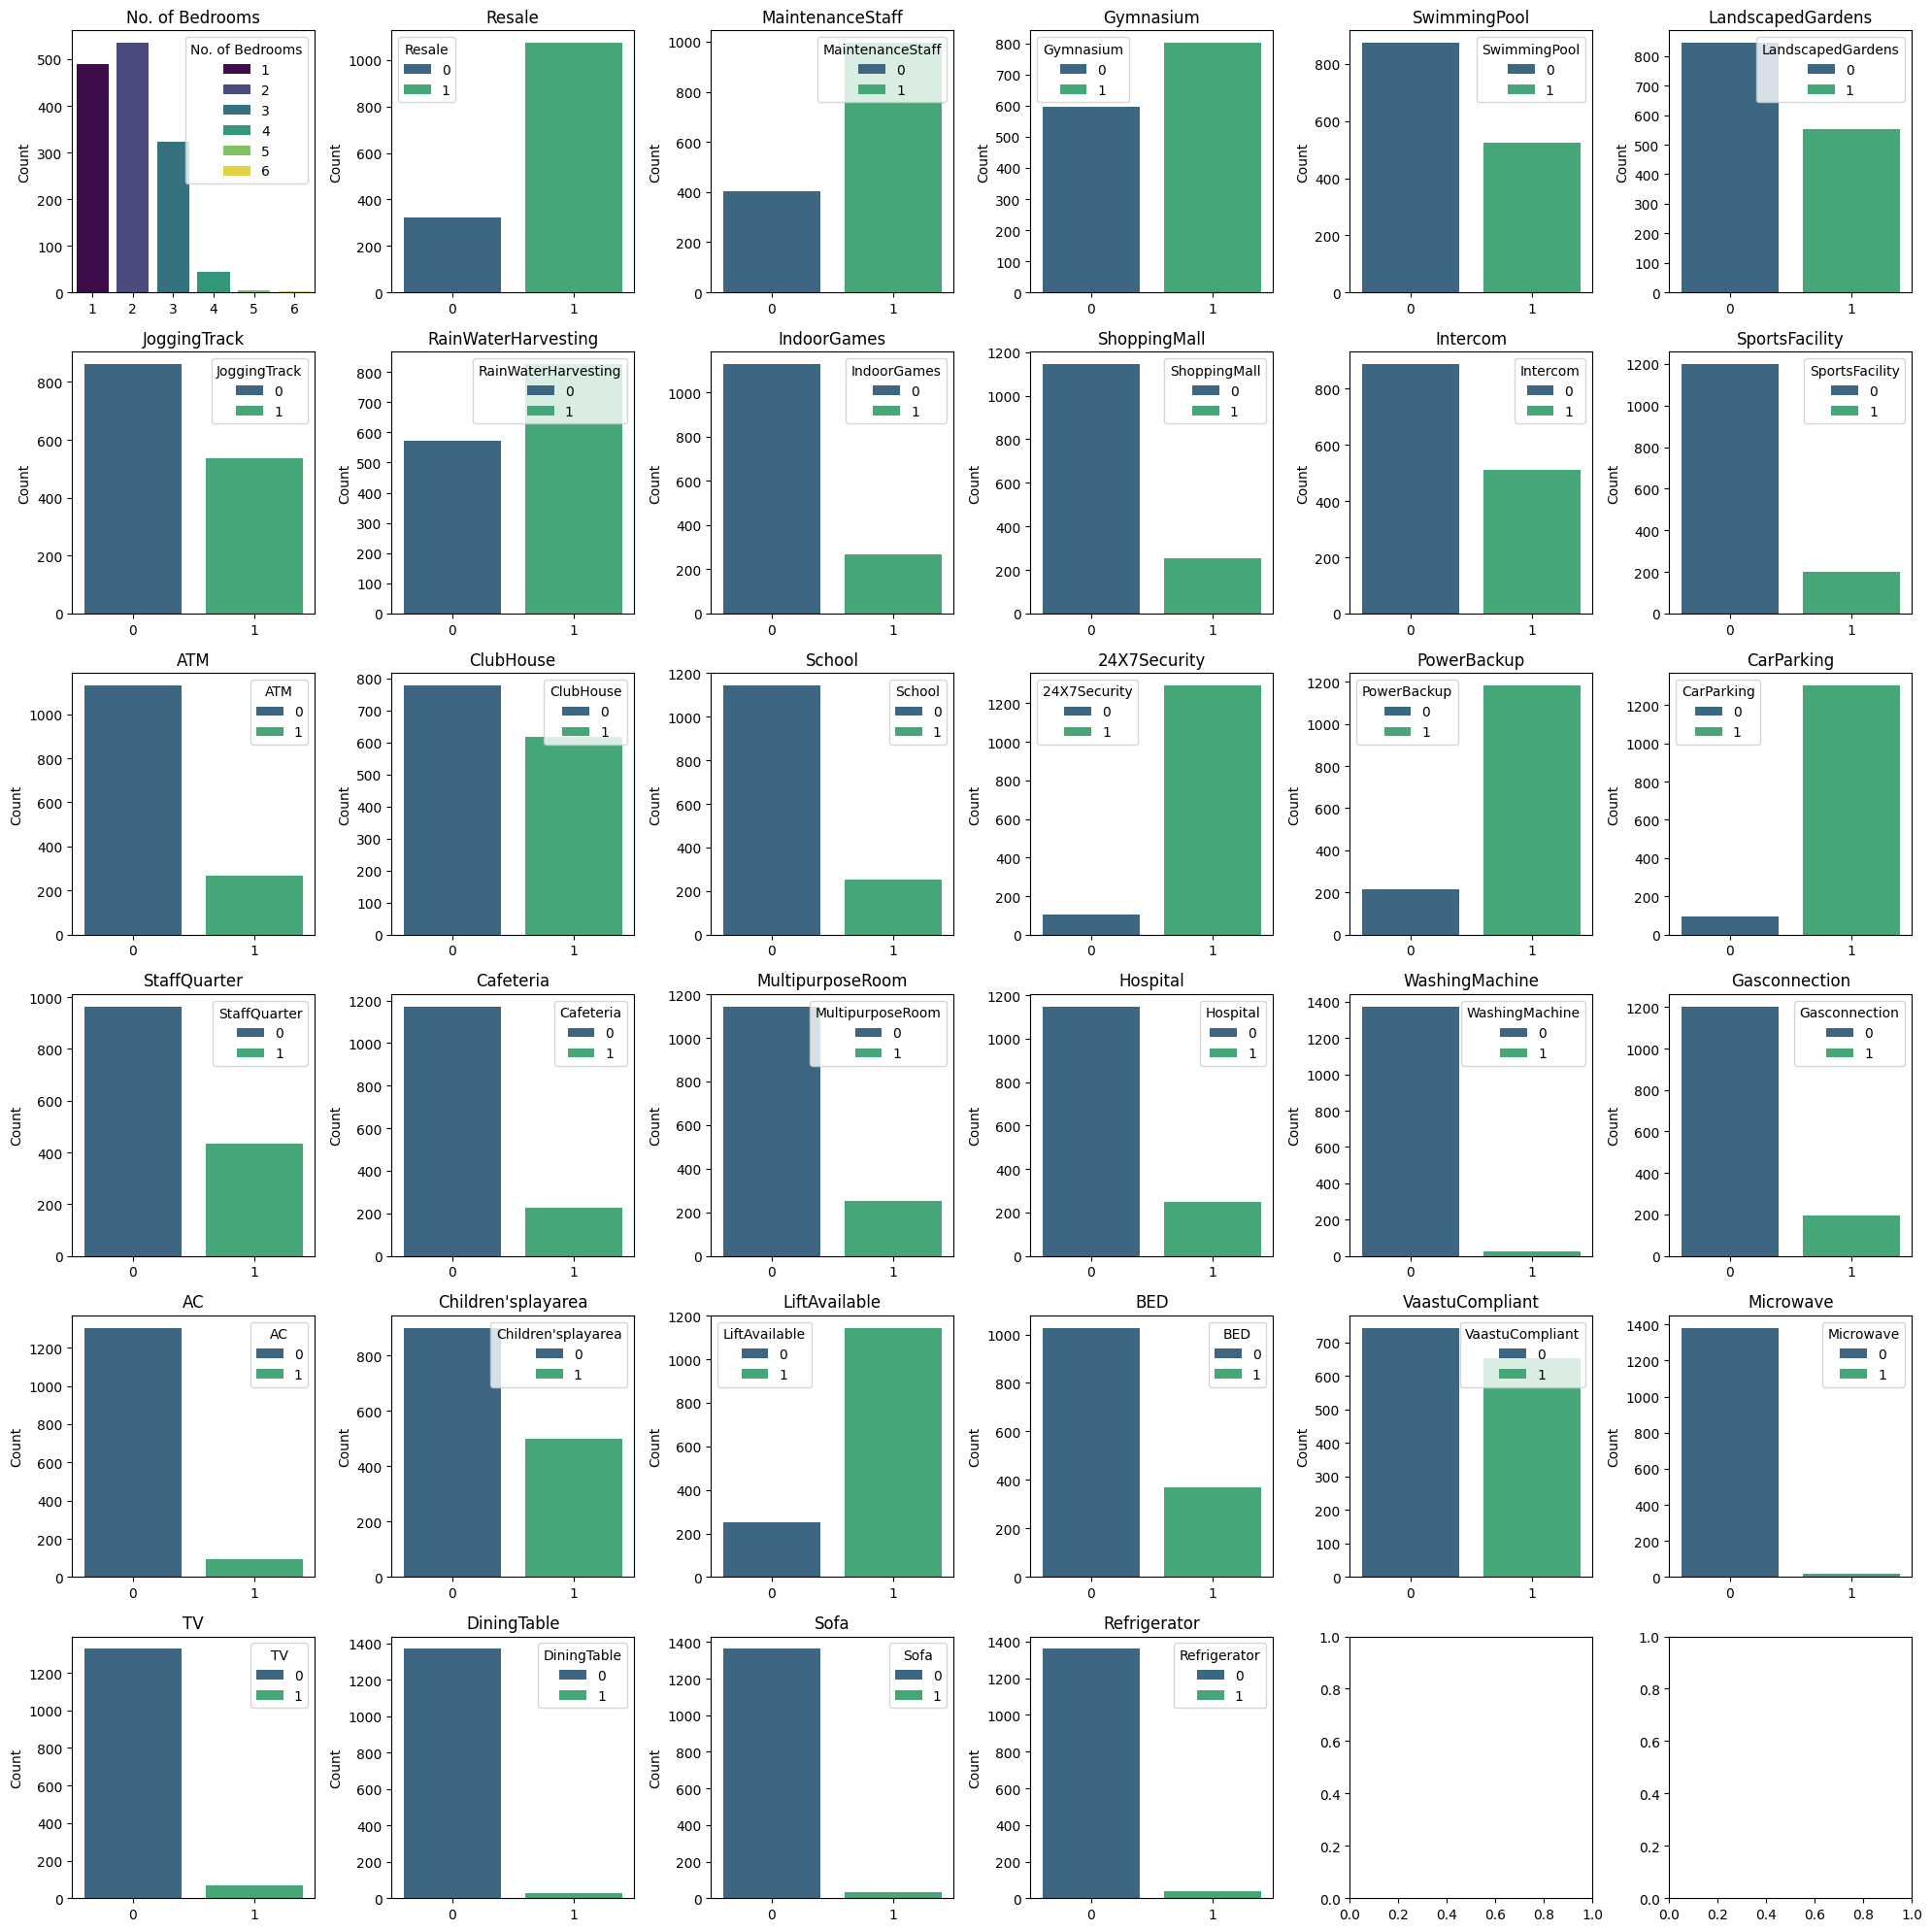

In [18]:
# Selecting only the categorical columns
categorical_columns = ['No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', "Children'splayarea", 'LiftAvailable', 'BED',
       'VaastuCompliant', 'Microwave', 'TV', 'DiningTable', 'Sofa',
       'Refrigerator']

# Plotting count plots for each categorical variable
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=data, ax=axes[i//6, i%6],palette='viridis',hue=column)
    axes[i//6, i%6].set_title(column)
    axes[i//6, i%6].set_xlabel('')
    axes[i//6, i%6].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Insights from Count Graphs:

1. The dataset includes houses with a varying number of rooms, ranging from 1 to 8.
2. Observing the count plots for features such as 'Dining Table', 'Sofa', 'Refrigerator', 'TV', 'AC', 'Microwave',  'Washing Machine' we notice significant uneven distribution or skewness in the data.
means all this facility are not provided in most of cases while purchasing of a housing.

4.3 "Plotting a Bar Graph: Mean House Prices by Location"

C:\Users\aksha\AppData\Local\Temp\ipykernel_24328\460577999.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Price', data=average_prices,palette='viridis')


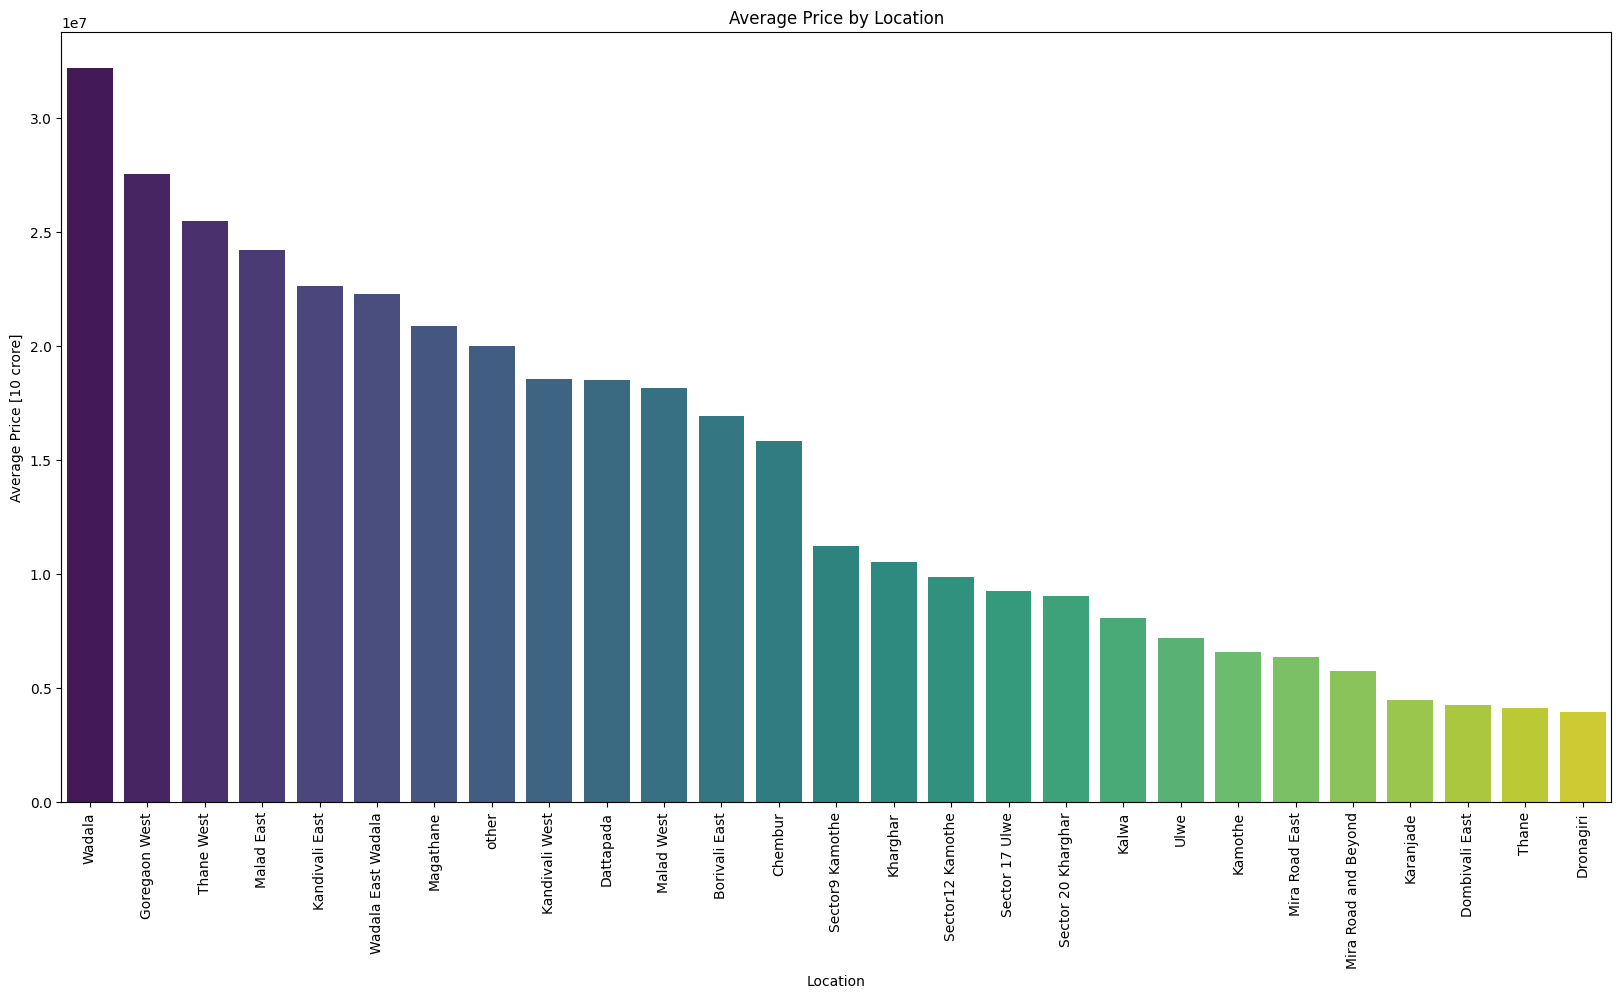

In [19]:
# Aggregate data by location (e.g., by taking the mean price for each location)
average_prices = data.groupby('Location')['Price'].mean().reset_index()

# Sort the data by average price
average_prices = average_prices.sort_values(by='Price', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x='Location', y='Price', data=average_prices,palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Location')
plt.ylabel('Average Price [10 crore]')
plt.title('Average Price by Location')
plt.show()

#### Insights:
1. The most affluent areas, such as Banjara Wadala,Goregoen West are likely the luxurious neighborhoods of Mumbai, while areas with the least expensive houses include Krishna Reddy and Adibatla.
2. The majority of house prices fall within the range of 5 million to 20 million INR.

4.4 Line plot showing relation between each feature and price

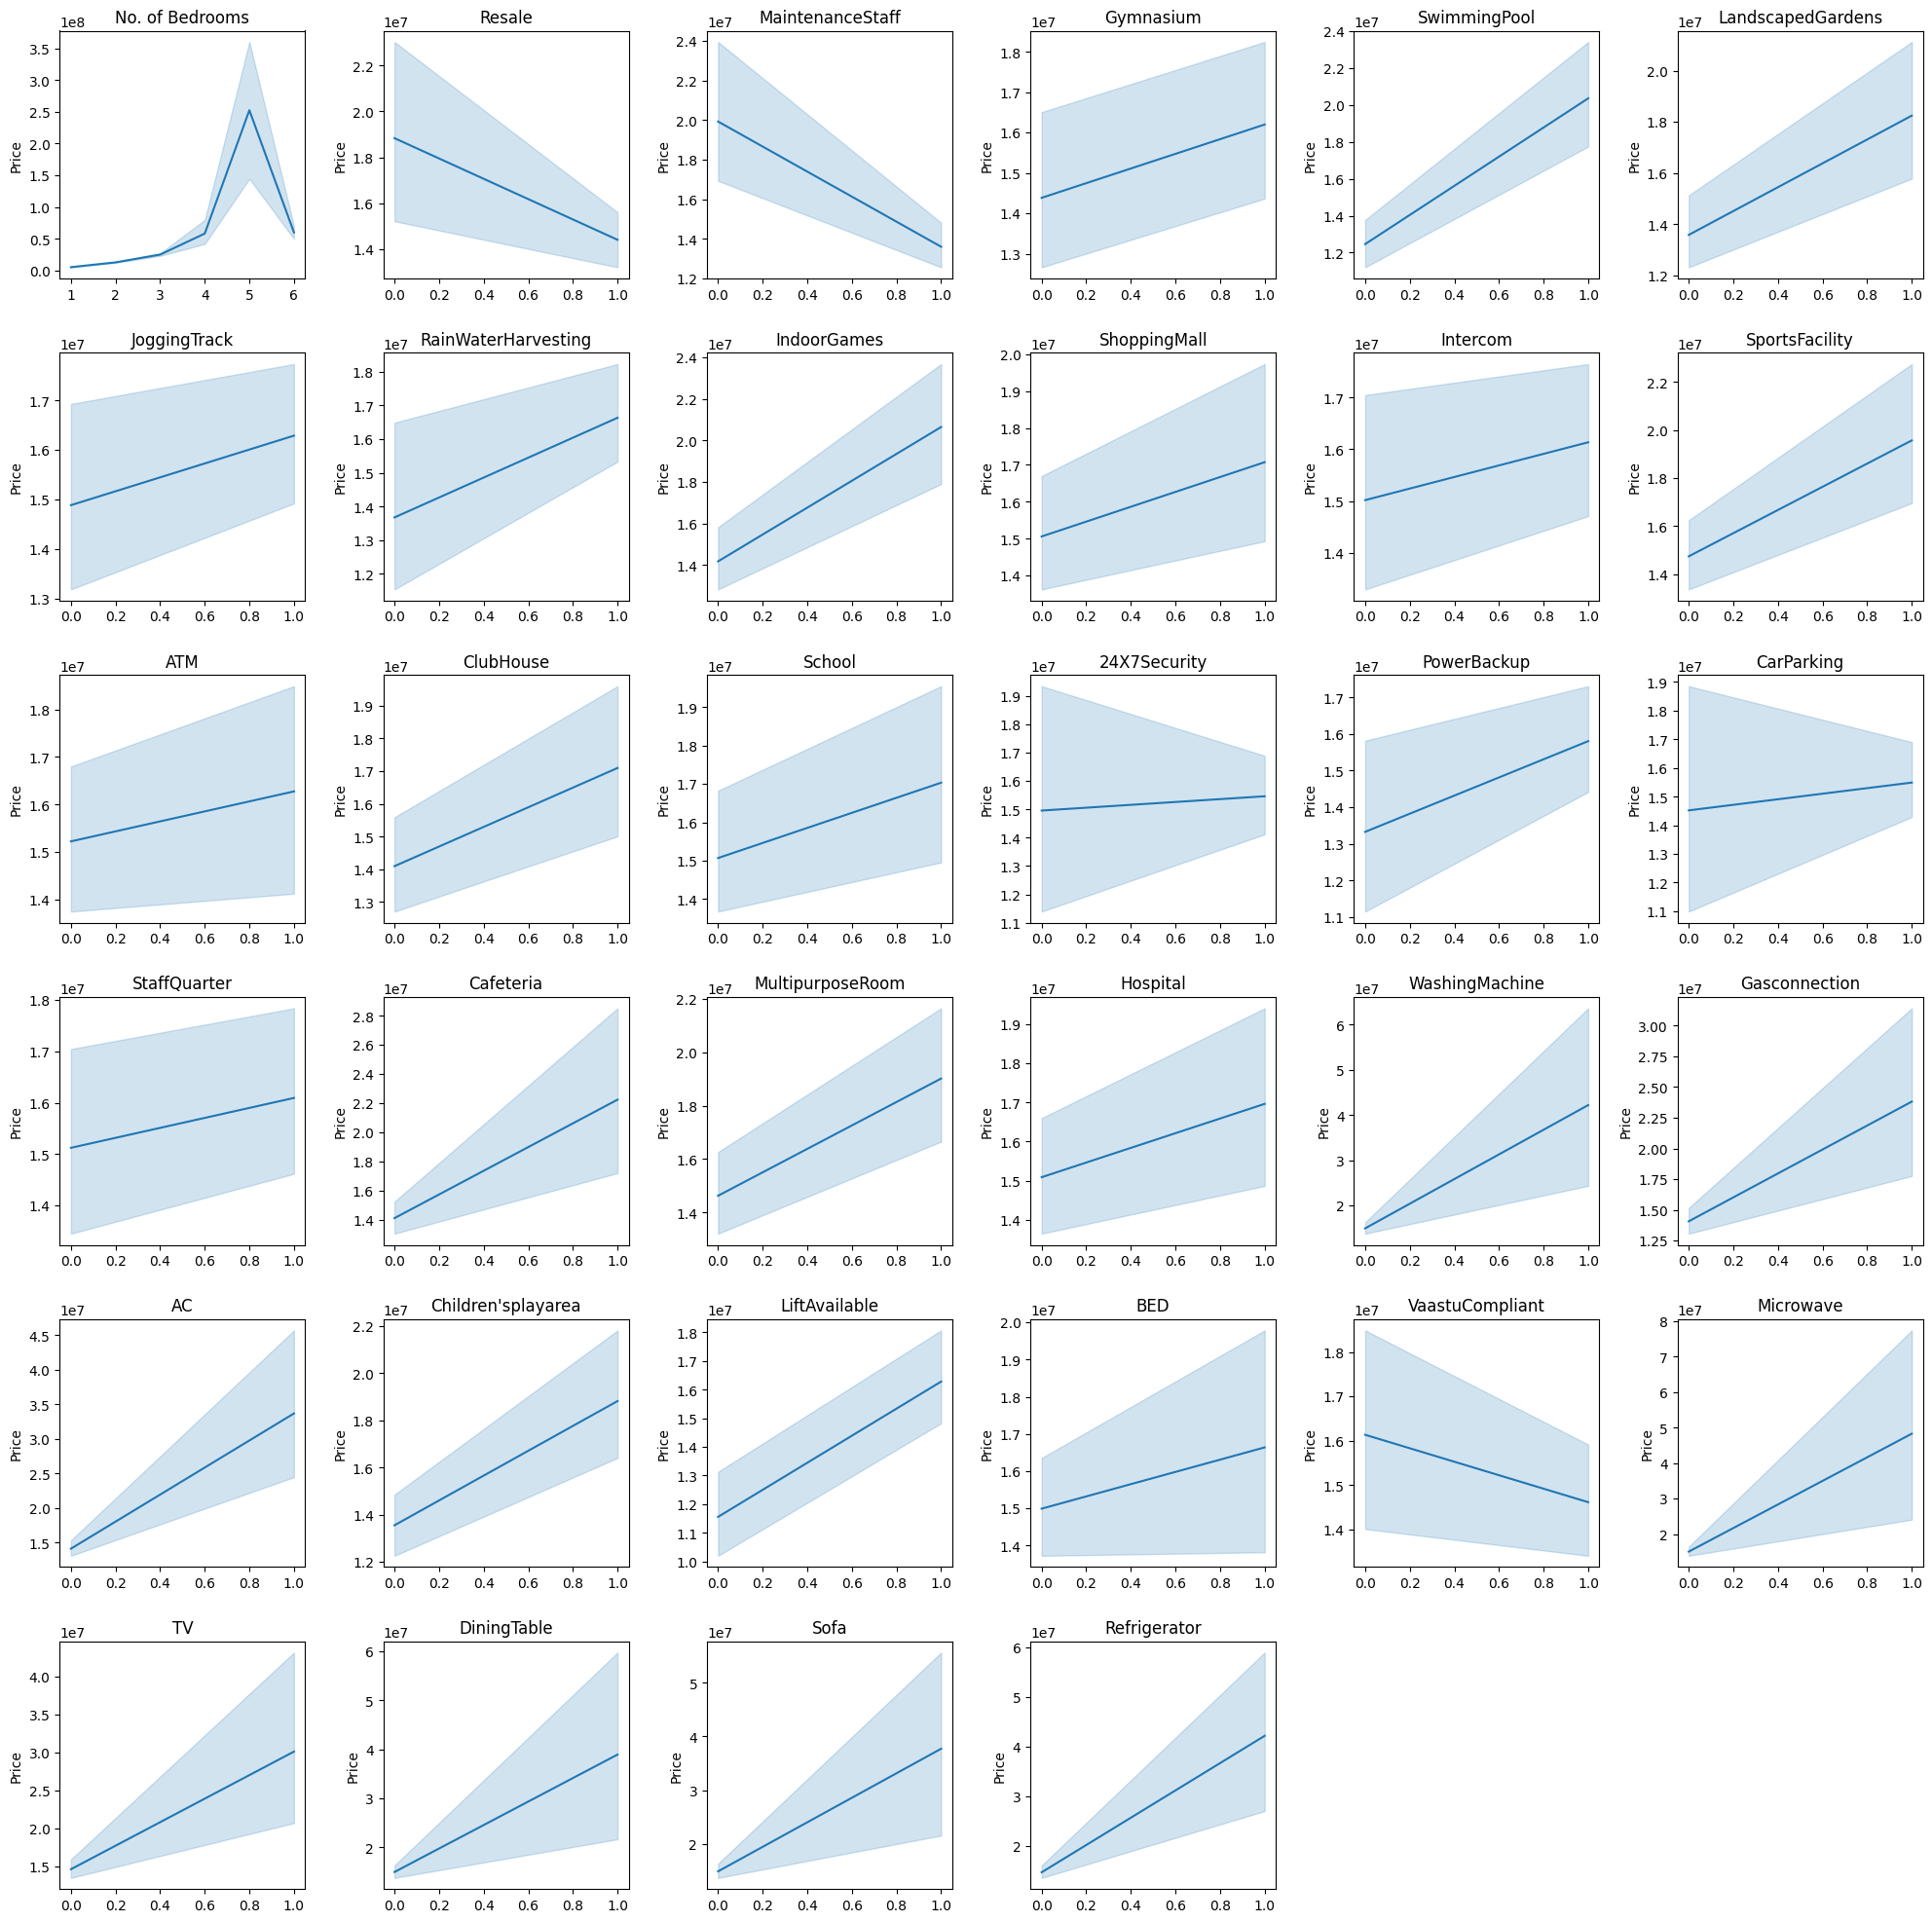

In [20]:
# Setting up the figure with appropriate size
plt.figure(figsize=(20, 20))

# Plotting line plots for each categorical variable against Price
for i, column in enumerate(categorical_columns):
    plt.subplot(6, 6, i+1)
    sns.lineplot(x=data[column], y=data['Price'], estimator='mean')  # You can change 'mean' to 'median' if you prefer
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

#### Insights:
1. The line plots display shadows, with wider shadows behind the line indicating a higher concentration of data points in that range, and vice versa.
2. The presence or absence of features such as '24X7Security','CarParking' near the house does not have a significant impact on price. Hence, in the next step, we will drop these columns to simplify the model and reduce complexity.
3. An interesting observation is that most of features show a positive correlation with price, implying that the presence of any feature tends to increase the price of the house.
4. People of Mumbai are much aware of vaastu, if there any complaint of vastu the price of hoouse decreases.

In [21]:
data = data.drop(columns=['24X7Security','CarParking'])

#### 5 Standardizing the Data
5.1 Since we only have the 'Area' column as the feature with numerical or continuous values, we will standardize this column only.

In [22]:
std = StandardScaler()
data['Area'] = std.fit_transform(data[['Area']])

#### 6 LabelEncoding

In [23]:
len(data['Location'].value_counts())

27

6.1 Assigning Numerical Values to Locations
- We have 27 unique locations repeated across all 2434 data points. Label encoding will assign a unique numerical value to each location, facilitating numerical processing by machine learning models. This transformation is crucial as models require numerical input rather than strings, ensuring efficient data interpretation and model performance.

In [24]:
encoder = LabelEncoder()

In [25]:
data['Location'] = encoder.fit_transform(data['Location'])

Splitting Data

In [26]:
x = data.drop(columns='Price',axis=1)
y = data['Price']

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

#### 7. Model Selection And Training

7.1 Defining Model Evaluation Function:
- We are utilizing two models, RandomForestRegressor and XGBRegressor, to predict housing prices. A function is defined to take features and corresponding labels, assessing their accuracy using the R2 score metric.

In [28]:
models = [RandomForestRegressor(),XGBRegressor()]

def accuracy(columns,target):
    for model in models:
        print(model)
        model.fit(columns,target)
        pred = model.predict(columns)
        accuracy = r2_score(target,pred)
        print('R2 score is ',accuracy,'\n-----------------------------------------------------------------------------')

7.2 Evaluating Models with Train Data:
- Initially, we calculate the R2 score using the training data itself. This step is crucial to ensure that the models do not overfit and can generalize well to unseen data.

In [29]:
print('====================================')
print('CHECHKING ACCURACY SCORES OF MODEL')
print('====================================\n')
accuracy(xtrain,ytrain)

CHECHKING ACCURACY SCORES OF MODEL

RandomForestRegressor()


R2 score is  0.9488327083922851 
-----------------------------------------------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R2 score is  0.9986823618647116 
-----------------------------------------------------------------------------


7.3 Evaluating Models with Train and Test Data:
- Initially, we calculate the R2 score using the training data itself. Similarly, we evaluate the models using the test data to confirm their performance on unseen data.

In [30]:
print('=====================================================================================================================')
print('CHECHKING ACCURACY SCORES OF MODEL')
print('=====================================================================================================================\n')
accuracy(xtest,ytest)

CHECHKING ACCURACY SCORES OF MODEL

RandomForestRegressor()
R2 score is  0.9349928816321905 
-----------------------------------------------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R2 score is  0.9985078392712512 
-------------------------------------------------

#### Insights- 
In both training and testing data , the accuracy of XGBregressor is high, thus we will take this model for deployment.

7.4 Final model - XGBRegressor

In [31]:
model = XGBRegressor()

In [32]:
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

7.5 Testing Model Prediction on Random Data:
- To assess the model's predictive capability, we randomly select a data point using data.sample() and provide its features to our model. We then evaluate whether the model accurately predicts the corresponding label for this data point.

In [34]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# data.sample()
# input = [0.27642,26,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]
# input[0] = std.transform([[input[0]]])[0][0]
# location = input[1]
# try:
#  input[1] = encoder.transform([location])[0]
# except:
#  location = 'other'
#  input[1] = encoder.transform([location])[0]
# input = np.asarray(input).reshape(1,-1)
# pred = model.predict(input)
# pred

c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### 8 Ready for Deployment
- After thorough testing, our model demonstrates the ability to make accurate predictions. With satisfactory performance, the model is now deemed ready for deployment .

8.1 Saving the trained model

In [36]:
filename = 'mumbai_model.sav'
pickle.dump(model,open(filename,'wb'))

8.2 Saving the Standard Scaler Function

In [37]:
standard = 'StandardScaler_mumbai.sav'
pickle.dump(std,open(standard,'wb'))

8.3 Saving the Label Encoder Function

In [38]:
encoding = 'encoder_mumbai.sav'
pickle.dump(encoder,open(encoding,'wb'))